In [53]:
from torchvision.transforms import transforms


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

classes = ['drawing', 'hentai', 'neutral', 'porn', 'sexy']


In [72]:
from mobilenetv3 import mobilenetv3_large
import torch


model = mobilenetv3_large()
checkpoint = torch.load('models/Epoch24.pt', map_location=torch.device('cpu'))
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

print()

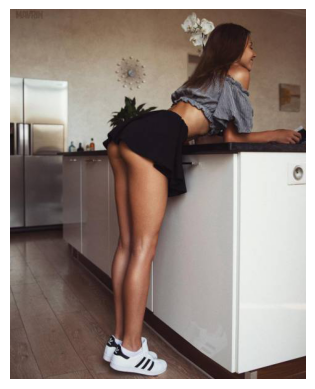

[1.1740025281906128, 3.4658756256103516, -0.9302182197570801, -4.172850131988525, -3.7615468502044678]
hentai


In [74]:
import torch
import matplotlib.pyplot as plt
from PIL import Image


def preprocess_image(image_path):
    image = Image.open(image_path)
    plt.axis('off')
    plt.imshow(image)
    plt.show()
    image = transform(image)
    image = image.unsqueeze(0)
    print(image.shape)
    return image

image = preprocess_image('test_images/sexy.jpeg')

with torch.no_grad():
    pred = model(image)[0].tolist()
    print(pred)
    pred = classes[pred.index(max(pred))]
    print(pred)